# Lobster output files

This example shows how to analyze the output files
produced by [Lobster](http://schmeling.ac.rwth-aachen.de/cohp)

Use

    abiopen.py FILE

with the `--expose` or `--print` for a command line interface
and `--notebook` to generate a jupyter notebook from a lobster `FILE`.

Note: The code in this notebook requires abipy >= 0.6

Let's start by importing the basic modules needed for this tutorial.

In [1]:
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings

from abipy import abilab
abilab.enable_notebook() # This line tells AbiPy we are running inside a notebook
import abipy.data as abidata

# This line configures matplotlib to show figures embedded in the notebook.
# Replace `inline` with `notebook` in classic notebook
%matplotlib inline

# Option available in jupyterlab. See https://github.com/matplotlib/jupyter-matplotlib
#%matplotlib widget

## How to analyze the COHPCAR file

In [2]:
# Path to one of the reference file shipped with AbiPy
import os
dirpath = os.path.join(abidata.dirpath, "refs", "lobster_gaas")
filename = os.path.join(dirpath, "GaAs_COHPCAR.lobster.gz")

# Open the COHPCAR.lobster file (same API for COOPCAR.lobster)
cohp_file = abilab.abiopen(filename)
print(cohp_file)

Creating temporary file: /var/folders/nc/k69spyd12qv2tk3stk2xrxg40000gr/T/tmpwxxoc0lgGaAs_COHPCAR.lobster

COHP: Number of energies: 401, from -14.035 to 6.015 (eV) with E_fermi set 0 (was 2.298)
has_partial_projections: True, nsppol: 1
Number of pairs: 2
[0] Ga@0 --> As@1
[1] As@1 --> Ga@0


To plot the COHP averaged over all atom pairs specified:

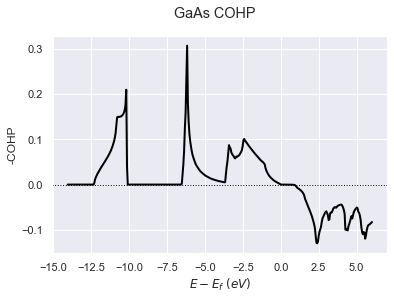

In [3]:
cohp_file.plot(title="GaAs COHP");

To plot the integrated COHP averaged over all atom pairs:

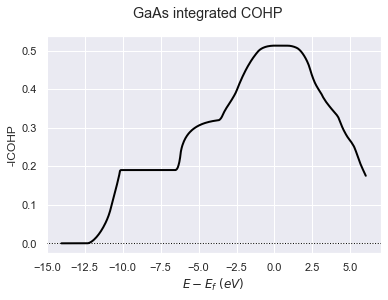

In [4]:
cohp_file.plot(what="i", title="GaAs integrated COHP");

To plot the total overlap for all sites listed in `from_site_index`

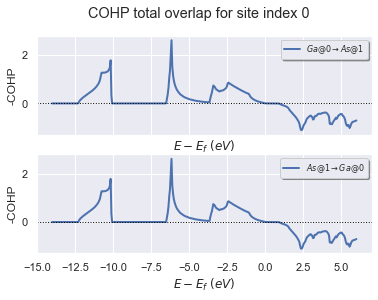

In [5]:
cohp_file.plot_site_pairs_total(from_site_index=[0, 1], title="COHP total overlap for site index 0");

To plot partial crystal orbital projections for all sites listed in `from_site_index`:

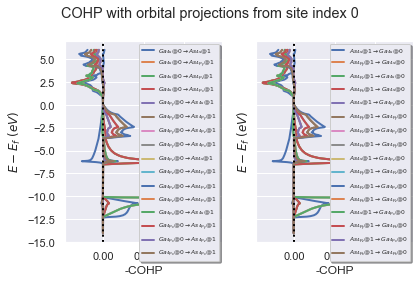

In [6]:
cohp_file.plot_site_pairs_partial(from_site_index=[0, 1],
                                  title="COHP with orbital projections from site index 0",
                                  fontsize=6, tight_layout=True);

In [7]:
#cohp_file.plot_average_pairs(with_site_index=[0]);

Use `abiopen` to open the MDF:

## How to analyze the ICOHPLIST file

In [8]:
# Path to one of the AbiPy file
dirpath = os.path.join(abidata.dirpath, "refs", "lobster_gaas")
filename = os.path.join(dirpath, "GaAs_ICOHPLIST.lobster.gz")

# Open the ICOHPCAR.lobster file.
icohp_file = abilab.abiopen(filename)
print(icohp_file)

Creating temporary file: /var/folders/nc/k69spyd12qv2tk3stk2xrxg40000gr/T/tmpslcjks2gGaAs_ICOHPLIST.lobster
Number of pairs: 2
 index0  index1 type0 type1  spin  average distance n_bonds   pair
      0       1    Ga    As     0 -4.36062  2.49546    None (0, 1)
      1       0    As    Ga     0 -4.36062  2.49546    None (1, 0)


## How to analyze the DOSCAR file

In [9]:
dirpath = os.path.join(abidata.dirpath, "refs", "lobster_gaas")
filename = os.path.join(dirpath, "GaAs_DOSCAR.lobster.gz")

# Open the ICOHPCAR.lobster file.
doscar = abilab.abiopen(filename)
print(doscar)

Creating temporary file: /var/folders/nc/k69spyd12qv2tk3stk2xrxg40000gr/T/tmpkcj0aqgyGaAs_DOSCAR.lobster
Number of energies: 401, from -14.035 to 6.015 (eV) with E_fermi set to 0 (was 2.298)
nsppol: 1
Number of sites in projected DOS: 2
0 --> {4s, 4p_y, 4p_z, 4p_x}
1 --> {4s, 4p_y, 4p_z, 4p_x}


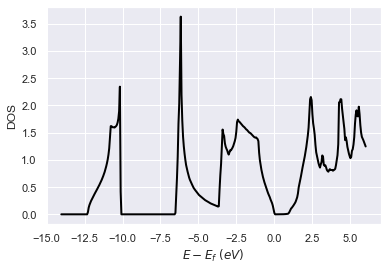

In [10]:
doscar.plot();

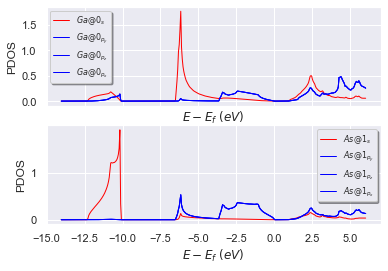

In [11]:
doscar.plot_pdos_site(site_index=[0, 1]);

## Analyzing all Lobster output files with LobsterAnalyzer

Let's assume we have a directory with lobster output files
for COOP, COHP, DOS and we need to produce plots showing all these results altogether.
In this case, one can use the `LobsterAnalyzer` object and initialize it from the directory
containing the output files.

In [12]:
dirpath = os.path.join(abidata.dirpath, "refs", "lobster_gaas")

# Open the all the lobster files produced in directory dirpath
# with the (optional) prefix GaAs_
lobana = abilab.LobsterAnalyzer.from_dir(dirpath, prefix="GaAs_")
print(lobana.to_string(verbose=1))

================================= COOP File =================================
Name: GaAs_COOPCAR.lobster.gz
Directory: /Users/gmatteo/git_repos/abipy/abipy/data/refs/lobster_gaas
Size: 23.04 kb
Access Time: Fri Mar  5 14:36:51 2021
Modification Time: Wed Mar 20 16:53:35 2019
Change Time: Wed Mar 20 16:53:35 2019

COOP: Number of energies: 401, from -14.035 to 6.015 (eV) with E_fermi set 0 (was 2.298)
has_partial_projections: True, nsppol: 1
Number of pairs: 2
[0] Ga@0 --> As@1
[1] As@1 --> Ga@0

================================= COHP File =================================
Name: GaAs_COHPCAR.lobster.gz
Directory: /Users/gmatteo/git_repos/abipy/abipy/data/refs/lobster_gaas
Size: 24.06 kb
Access Time: Fri Mar  5 14:36:51 2021
Modification Time: Wed Mar 20 16:53:35 2019
Change Time: Wed Mar 20 16:53:35 2019

COHP: Number of energies: 401, from -14.035 to 6.015 (eV) with E_fermi set 0 (was 2.298)
has_partial_projections: True, nsppol: 1
Number of pairs: 2
[0] Ga@0 --> As@1
[1] As@1 --> Ga@0

To plot COOP + COHP + DOS, use:

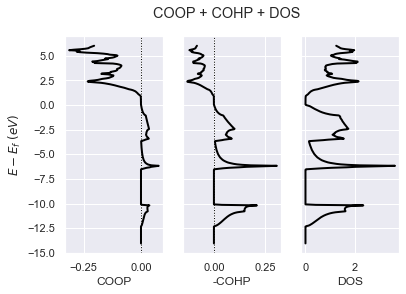

In [13]:
lobana.plot(title="COOP + COHP + DOS");

To plot COHP for all sites in from_site_index and Lobster DOS:

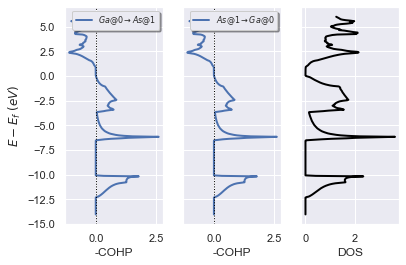

In [14]:
lobana.plot_coxp_with_dos(from_site_index=[0, 1]);

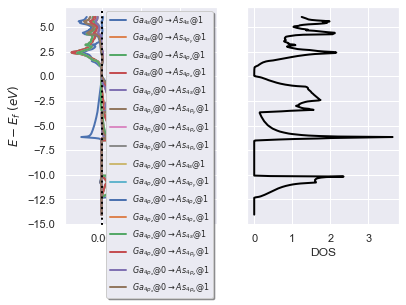

In [15]:
# Plot orbital projections.
lobana.plot_coxp_with_dos(from_site_index=[0], with_orbitals=True);

In [16]:
#lobana.plot_with_ebands(ebands="out_GSR.nc")

<div class="alert alert-info" role="alert">
For a command line interface, use: `abiview.py lobster .`.
Use the `--expose` option to generate plots automatically.
</div>